## <center> Ajuste de Distribuciones </center>


### 1. Cargar los datos

In [98]:
# Librerias necesarias
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats

# Cargar datos
data = pd.read_excel('Datos.xlsx')

# Crear variables
datos = data['Datos']


### 2. Seleccionar una Familía de Distribuciones
El primer paso para seleccionar una distribución es decidir que familias generales (por ejemplo, exponencial, normal o Poisson) parecen ser apropiadas en función de sus formas.

A continuación veremos varias heurísticas o pautas que se pueden usar para ayudar a elegir familias de distribuciones adecuadas.

#### Resumen de Estadísticas
- Compare estadísticas muestrales simples con versiones poblacionales teóricas para algunas distribuciones para obtener una pista. Tenga en cuenta que solo obtenemos estimaciones sujetas a incertidumbre.
- Si la media muestral $\overline{X}(n)$ y la mediana muestral $\hat{x}_{0.5}(n)$ están cerca, sugiere una distribución simétrica.
- *Coeficiente de variación* de una distribución: $\text{cv} = \frac{\sigma}{\mu}$; estimado mediante $\hat{\text{cv}} = \frac{S(n)}{\overline{X}(n)}$ a veces es útil para discriminar entre distribuciones continuas
    - si $\text{cv} < 1$ sugiere gamma o Weibull con parámetro de forma $\alpha < 1$
    - si $\text{cv} = 1$ sugiere exponencial
    - si $\text{cv} > 1$ sugiere gamma o Weibull con parámetro de forma $\alpha > 1$
- *Radio lexis* de una distribución: $\tau = \frac{\sigma^2}{\mu}$; estimado mediante $\hat{\tau} = \frac{S^2(n)}{\overline{X}(n)}$ a veces es útil para discriminar entre distribuciones discretas.
    - si $\tau < 1$ sugiere binomial
    - si $\tau = 1$ sugiere Poisson
    - si $\tau > 1$ sugiere binomial negativa o geométrica
- Otras estadísticas incluyen: rango, asimetría, curtosis









In [99]:
from scipy import stats
# Podemos hacer un resumen estadístico básico con NumPy
resumennp = {
    "Cuenta": np.size(datos),
    "Mínimo": np.min(datos),
    "Máximo": np.max(datos),
    "Media": np.mean(datos),
    "Mediana": np.median(datos),
    #"Moda": stats.mode(datos),
    "Desviación estándar": np.std(datos,ddof=1),
    "Varianza": np.var(datos,ddof=1),
    "Asimetría": stats.skew(datos),
    "Curtosis": stats.kurtosis(datos),
    "Coeficiente de variación": np.std(datos,ddof=1) / np.mean(datos),
    "Rango": np.ptp(datos),
    "Percentil 25": np.percentile(datos, 25),
    "Percentil 50": np.percentile(datos, 50),
    "Percentil 75": np.percentile(datos, 75),
}

# Mostrar el resumen estadístico

for clave, valor in resumennp.items():
    print(f'{clave}: {valor:.2f}')

Cuenta: 70.00
Mínimo: 141.00
Máximo: 238.00
Media: 196.56
Mediana: 198.00
Desviación estándar: 19.80
Varianza: 391.93
Asimetría: -0.21
Curtosis: -0.13
Coeficiente de variación: 0.10
Rango: 97.00
Percentil 25: 182.25
Percentil 50: 198.00
Percentil 75: 210.00


#### 2. Histograma

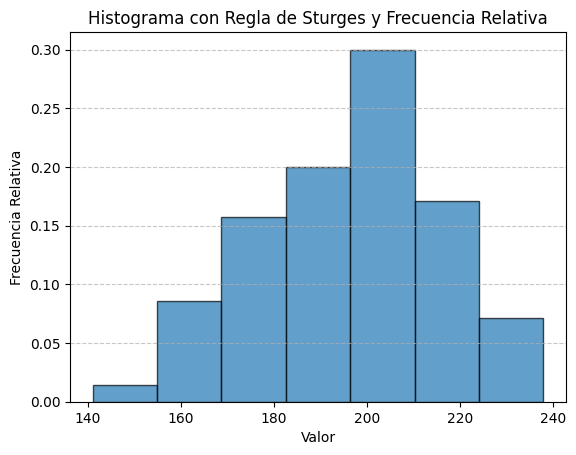

In [100]:
# Calcular el número de bins con la regla de Sturges
N = len(datos)  # Cantidad de datos
k_sturges = int(round(1 + np.log2(N), 0))  # Número de bins

# Graficar histograma con regla de Sturges y frecuencia relativa
plt.hist(datos, bins=k_sturges, edgecolor="black", alpha=0.7, weights=np.ones(len(datos)) / len(datos))

# Personalización del gráfico
plt.title("Histograma con Regla de Sturges y Frecuencia Relativa")
plt.xlabel("Valor")
plt.ylabel("Frecuencia Relativa")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

### 3. Estimación de parámetros
Para estimar los parámetros de una distribución por Máxima Verosimilitud (MLE) en Python a partir de un conjunto de datos, podemos usar la librería `scipy.stats`. Estimamos dos parametro; uno para cada distribuccion que queremos probar


In [101]:
limite_inferior = 140
limite_superior = 242.493
scale = limite_superior - limite_inferior

params = stats.triang.fit(datos,floc=limite_inferior, fscale=scale)
print(*params)

params2=stats.norm.fit(datos, loc=140, scale=1)
print(*params2)

0.6439453124999996 140 102.493
196.55714285714285 19.65534148722916


### 4. Pruebas de bondad de ajuste
#### Prueba Kolmogorov-Smirnov (para la normal y la triangular)

In [102]:
ks_stat, p_value = stats.kstest(datos, stats.triang.cdf, args=params)
ks_stat2, p_value2 = stats.kstest(datos, stats.norm.cdf, args=params2)

valor_estadistico_KS = 1.36/np.sqrt(len(datos))

print(f"Valor estadístico KS: {valor_estadistico_KS:.4f}")
print("")
print(f"Estadístico KS para distribución triangular: {ks_stat:.4f}")
print(f"p-value para distribución triangular: {p_value:.4f}")
print("")
print(f"Estadístico KS para distribución normal: {ks_stat2:.4f}")
print(f"p-value para distribución normal: {p_value2:.4f}")

Valor estadístico KS: 0.1626

Estadístico KS para distribución triangular: 0.0754
p-value para distribución triangular: 0.7927

Estadístico KS para distribución normal: 0.0827
p-value para distribución normal: 0.6932


# Resultados
La hipotesis nula #1 es que los datos sigan una distribuccion triangular, y la hipotesis nula #2 es que los datos sigan una distribuccion normal.
En ambos casos el valor del estadistico calculado en la prueba Kolmogorov-Smirnov nos dio menor al valor critico del estadistico teorico. <p>

- Valor KS-Triangular $= 0.0754$
- Valor KS-Normal $= 0.0827$
- Valor estadistico teorico $ = 0.1626$

Por ende, en ambos casos se puede decir con un 95% de confianza que ambas hipotesis nulas no pueden ser rechazadas. Ahora bien con cual de las dos distribucciones nos quedamos ?. <p>
Para eso comparamos los p-values de ambas pruebas, el que de mas alto. Es el ganador:

- p-value-Triangular $ = 0.7927$
- p-value-Normal $= 0.6932$

El p-value de la distribuccion triangular es mayor que el p-value de la distribuccion normal, por ende se dice que con un 95% de confianza, la hipotesis nula #1 no puede ser rechazada.
